# Importing Libraryies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, r2_score, explained_variance_score, mean_squared_error
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering

# Loading Datasets

In [30]:
df_t = pd.read_csv('titanic_train.csv')
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df_t = df_t.drop(['Name', "Ticket", 'Cabin', 'Embarked', 'PassengerId'], axis=1)
df_t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [32]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [33]:
df_t.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### Filling null values

In [34]:
df_t['Age'] = df_t.fillna(df_t['Age'].median())

In [35]:
df_t.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Label Encoding

In [36]:
le = preprocessing.LabelEncoder()
df_t['Sex'] = le.fit_transform(df_t['Sex'])

In [37]:
df_t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0,1,0,7.2500
1,1,1,0,1,1,0,71.2833
2,1,3,0,1,0,0,7.9250
3,1,1,0,1,1,0,53.1000
4,0,3,1,0,0,0,8.0500


# Pickling Data

In [38]:
with open('taitanic.pkl', 'wb') as f:
    pk.dump(df_t, f)

In [39]:
with open('taitanic.pkl', 'rb') as f:
    taitanic = pk.load(f)

In [40]:
taitanic.shape

(891, 7)

### Dividing Data

In [53]:
df_x = taitanic.drop('Survived', axis=1)
df_y = taitanic['Survived']

In [54]:
df_x.shape, df_y.shape

((891, 6), (891,))

### Standerdizing 

In [43]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [44]:
df_x.shape

(891, 6)

# Clustering

## K-Means

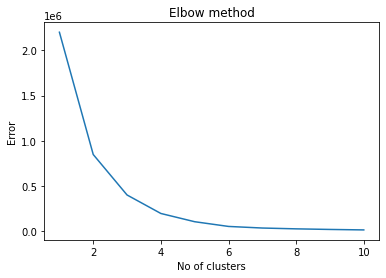

In [55]:
# Elbow Method
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=42,
                    algorithm='auto').fit(df_x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [46]:
grid_params = {
    'n_clusters': list(range(1, 10)),
    'algorithm': ['auto'],
    'random_state': [42],
    'init': ['k-means++'],
    'n_init': [3, 4, 5, 8, 10],
}
grid = GridSearchCV(KMeans(), grid_params, verbose=3, n_jobs=-1)
grid_model_kmean = grid.fit(df_x)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.9s finished


In [47]:
grid_model_kmean.best_params_

{'algorithm': 'auto',
 'init': 'k-means++',
 'n_clusters': 9,
 'n_init': 10,
 'random_state': 42}

### Fixing Values

In [58]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                random_state=42,
                algorithm='auto').fit(df_x)
pred_kmeans = list(kmeans.predict(df_x))

In [59]:
kmeans.labels_

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,

In [60]:
centroids = kmeans.cluster_centers_
centroids

array([[  2.55570839,   0.69050894,   0.31774415,   0.43053645,
          0.34250344,  15.3602868 ],
       [  1.        ,   0.4       ,   0.7       ,   0.75      ,
          1.05      , 279.308545  ],
       [  1.24305556,   0.46527778,   0.67361111,   0.95833333,
          0.48611111,  82.92256875]])

In [61]:
df_x['Cluster']= pd.DataFrame(pred_kmeans, columns=['cluster'])

In [64]:
df_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
0,3,1,0,1,0,7.2500,0
1,1,0,1,1,0,71.2833,2
2,3,0,1,0,0,7.9250,0
3,1,0,1,1,0,53.1000,2
4,3,1,0,0,0,8.0500,0


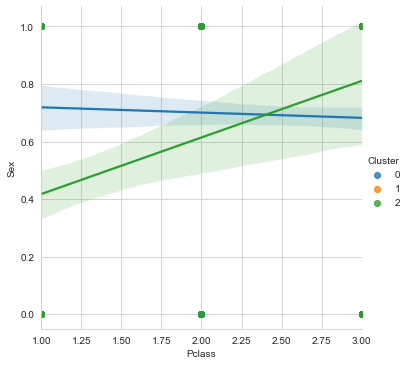

In [87]:
sns.set_style('whitegrid')
sns.lmplot(x='Pclass', y='Sex', data=df_x, fit_reg=True, hue='Cluster', legend=True)

plt.show()

In [83]:
plt.scatter(df_x[:,0], df_x[:,1],c=kmeans, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

## Hirarchey / Aggloremative

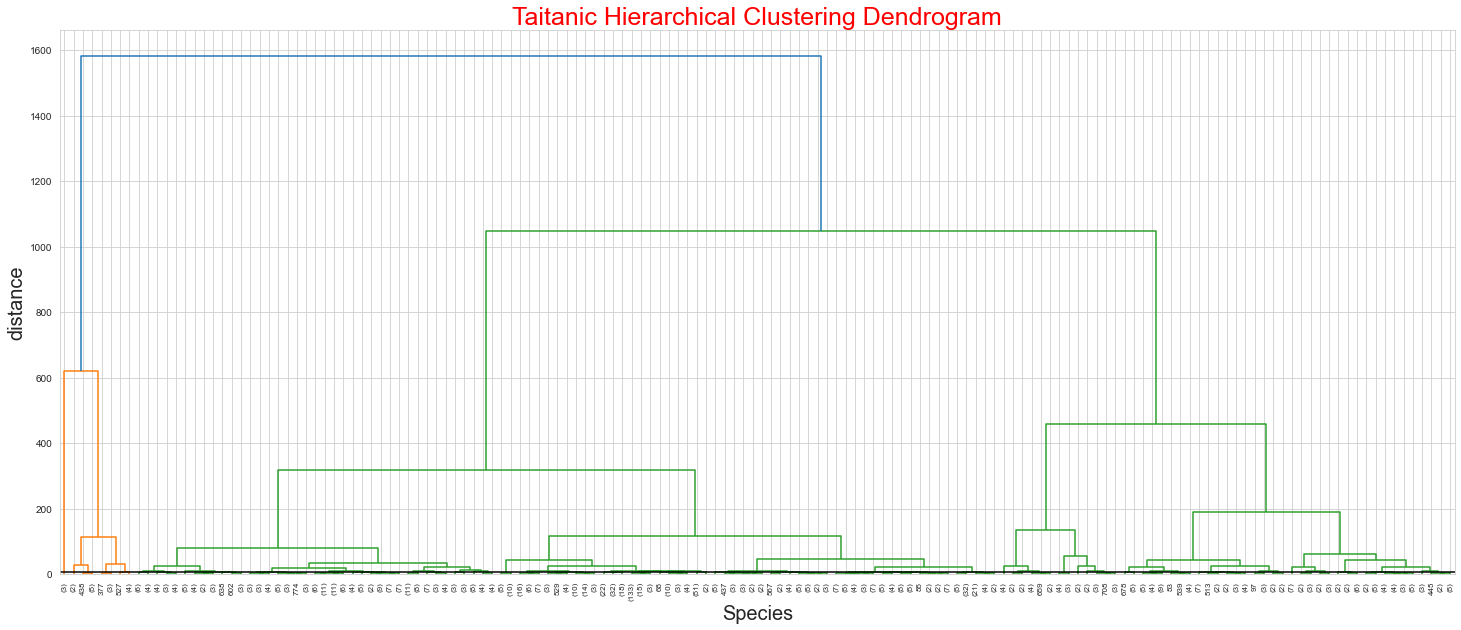

In [89]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df_x, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Taitanic Hierarchical Clustering Dendrogram', fontsize=25, color='red')
plt.xlabel('Species', fontsize= 20)
plt.ylabel('distance', fontsize= 20)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

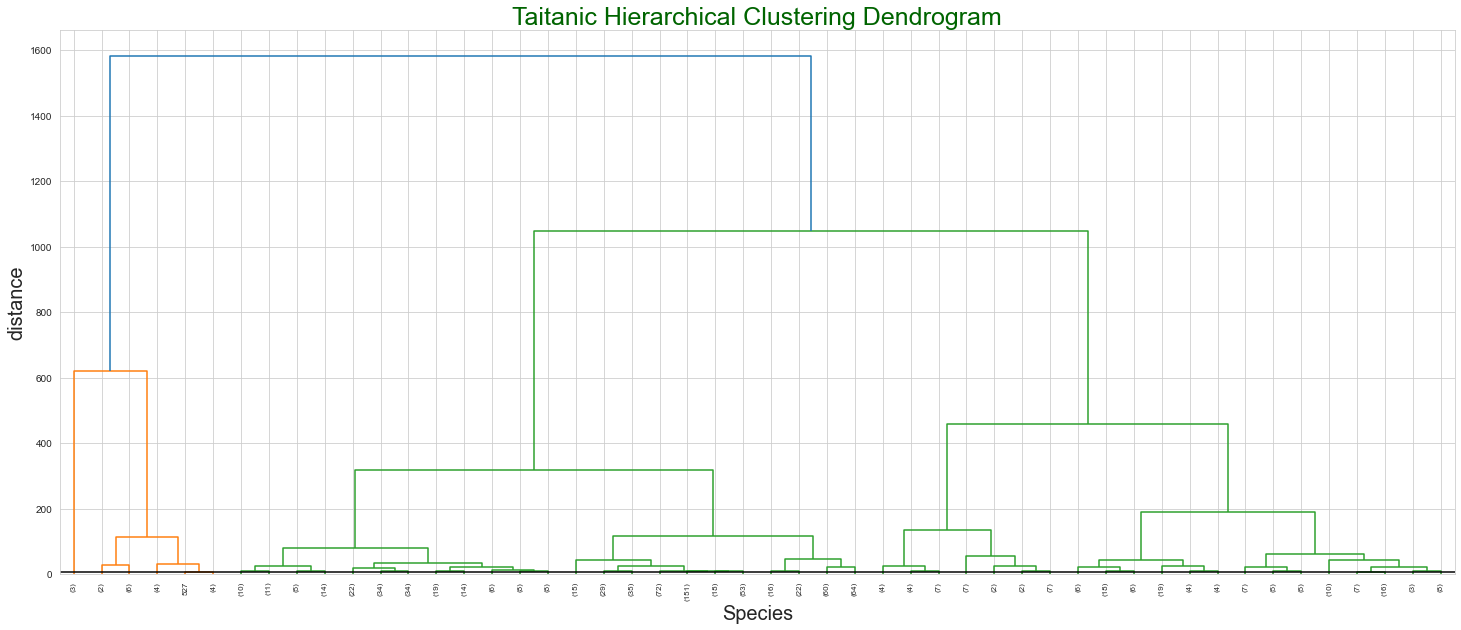

In [90]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df_x, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Taitanic Hierarchical Clustering Dendrogram', fontsize=25, color='darkgreen')
plt.xlabel('Species', fontsize= 20)
plt.ylabel('distance', fontsize= 20)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show() 

In [91]:
model = AgglomerativeClustering(n_clusters=3,
                                linkage='ward',
                                affinity='euclidean').fit(df_x)
labels = model.labels_

In [92]:
labels

array([2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,